In [5]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk("D:\Fish.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [8]:
fish= pd.read_csv("D:\Fish.csv")

In [9]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [10]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [11]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [12]:
fish.shape

(159, 7)

### Data Quality Check 

In [13]:
# percentage of missing values in each column
round((100*(fish.isnull().sum())/len(fish)),2)

Species    0.0
Weight     0.0
Length1    0.0
Length2    0.0
Length3    0.0
Height     0.0
Width      0.0
dtype: float64

In [14]:
# percentage of missing values in each row
round((100*(fish.isnull().sum(axis=1))/len(fish)),2).sort_values(ascending= False)

0      0.0
109    0.0
102    0.0
103    0.0
104    0.0
      ... 
54     0.0
55     0.0
56     0.0
57     0.0
158    0.0
Length: 159, dtype: float64

### Duplicate Check¶


In [15]:
fish_dub=fish.copy()

In [16]:
fish_dub.shape

(159, 7)

In [17]:
fish.shape

(159, 7)

### Data Cleaning¶


In [18]:
for col in fish:
    print(fish[col].value_counts(ascending=False), '\n\n\n')

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64 



300.0     6
500.0     5
120.0     5
700.0     5
1000.0    5
         ..
19.7      1
197.0     1
306.0     1
680.0     1
800.0     1
Name: Weight, Length: 101, dtype: int64 



19.0    6
20.0    5
20.5    4
22.0    4
25.4    3
       ..
36.2    1
26.3    1
37.1    1
32.8    1
18.6    1
Name: Length1, Length: 116, dtype: int64 



22.0    7
35.0    6
40.0    5
22.5    5
21.0    4
       ..
42.0    1
39.5    1
21.3    1
26.3    1
20.8    1
Name: Length2, Length: 93, dtype: int64 



23.5    5
22.5    3
36.2    3
25.0    3
28.9    3
       ..
27.2    1
24.1    1
39.5    1
21.3    1
36.4    1
Name: Length3, Length: 124, dtype: int64 



6.1100     2
2.2139     2
11.1366    2
9.6000     2
5.6925     2
          ..
15.9936    1
6.2884     1
15.6330    1
7.4052     1
5.5680     1
Name: Height, Length: 154, dtype: int64 



3.5250    3
3.6240    2
6.144

### Creating Dummy Variables

In [19]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [20]:
fish['Species']=fish['Species'].astype('category')

In [21]:
fish_new = pd.get_dummies(fish, drop_first=True)
fish_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weight             159 non-null    float64
 1   Length1            159 non-null    float64
 2   Length2            159 non-null    float64
 3   Length3            159 non-null    float64
 4   Height             159 non-null    float64
 5   Width              159 non-null    float64
 6   Species_Parkki     159 non-null    uint8  
 7   Species_Perch      159 non-null    uint8  
 8   Species_Pike       159 non-null    uint8  
 9   Species_Roach      159 non-null    uint8  
 10  Species_Smelt      159 non-null    uint8  
 11  Species_Whitefish  159 non-null    uint8  
dtypes: float64(6), uint8(6)
memory usage: 8.5 KB


In [22]:
fish_new.shape

(159, 12)

### SPLITTING THE DATA

In [23]:
fish_new.shape

(159, 12)

In [24]:
fish_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weight             159 non-null    float64
 1   Length1            159 non-null    float64
 2   Length2            159 non-null    float64
 3   Length3            159 non-null    float64
 4   Height             159 non-null    float64
 5   Width              159 non-null    float64
 6   Species_Parkki     159 non-null    uint8  
 7   Species_Perch      159 non-null    uint8  
 8   Species_Pike       159 non-null    uint8  
 9   Species_Roach      159 non-null    uint8  
 10  Species_Smelt      159 non-null    uint8  
 11  Species_Whitefish  159 non-null    uint8  
dtypes: float64(6), uint8(6)
memory usage: 8.5 KB


In [25]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(fish_new, train_size = 0.70, test_size = 0.30, random_state = 100)

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 6 to 8
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weight             111 non-null    float64
 1   Length1            111 non-null    float64
 2   Length2            111 non-null    float64
 3   Length3            111 non-null    float64
 4   Height             111 non-null    float64
 5   Width              111 non-null    float64
 6   Species_Parkki     111 non-null    uint8  
 7   Species_Perch      111 non-null    uint8  
 8   Species_Pike       111 non-null    uint8  
 9   Species_Roach      111 non-null    uint8  
 10  Species_Smelt      111 non-null    uint8  
 11  Species_Whitefish  111 non-null    uint8  
dtypes: float64(6), uint8(6)
memory usage: 6.7 KB


In [27]:
df_train.shape

(111, 12)

In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 45 to 37
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weight             48 non-null     float64
 1   Length1            48 non-null     float64
 2   Length2            48 non-null     float64
 3   Length3            48 non-null     float64
 4   Height             48 non-null     float64
 5   Width              48 non-null     float64
 6   Species_Parkki     48 non-null     uint8  
 7   Species_Perch      48 non-null     uint8  
 8   Species_Pike       48 non-null     uint8  
 9   Species_Roach      48 non-null     uint8  
 10  Species_Smelt      48 non-null     uint8  
 11  Species_Whitefish  48 non-null     uint8  
dtypes: float64(6), uint8(6)
memory usage: 2.9 KB


In [29]:
df_test.shape

(48, 12)

### EXPLORATORY DATA ANALYSIS

### Visualising Numeric Variables

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 6 to 8
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weight             111 non-null    float64
 1   Length1            111 non-null    float64
 2   Length2            111 non-null    float64
 3   Length3            111 non-null    float64
 4   Height             111 non-null    float64
 5   Width              111 non-null    float64
 6   Species_Parkki     111 non-null    uint8  
 7   Species_Perch      111 non-null    uint8  
 8   Species_Pike       111 non-null    uint8  
 9   Species_Roach      111 non-null    uint8  
 10  Species_Smelt      111 non-null    uint8  
 11  Species_Whitefish  111 non-null    uint8  
dtypes: float64(6), uint8(6)
memory usage: 6.7 KB


In [31]:
df_train.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

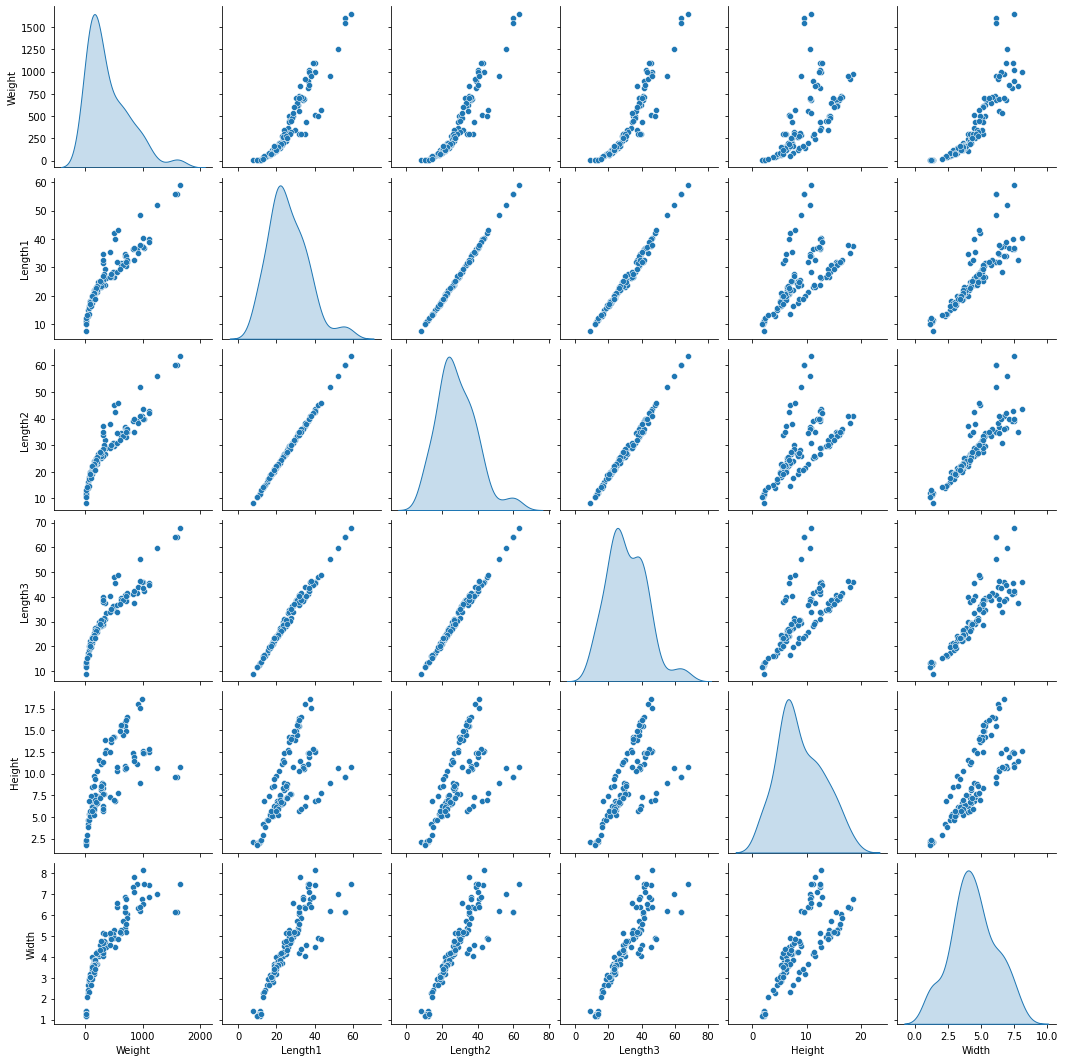

In [32]:
fish_num=df_train[[ 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]

sns.pairplot(fish_num, diag_kind='kde')
plt.show()

### Visualising Catagorical Variables

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 6 to 8
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weight             111 non-null    float64
 1   Length1            111 non-null    float64
 2   Length2            111 non-null    float64
 3   Length3            111 non-null    float64
 4   Height             111 non-null    float64
 5   Width              111 non-null    float64
 6   Species_Parkki     111 non-null    uint8  
 7   Species_Perch      111 non-null    uint8  
 8   Species_Pike       111 non-null    uint8  
 9   Species_Roach      111 non-null    uint8  
 10  Species_Smelt      111 non-null    uint8  
 11  Species_Whitefish  111 non-null    uint8  
dtypes: float64(6), uint8(6)
memory usage: 6.7 KB


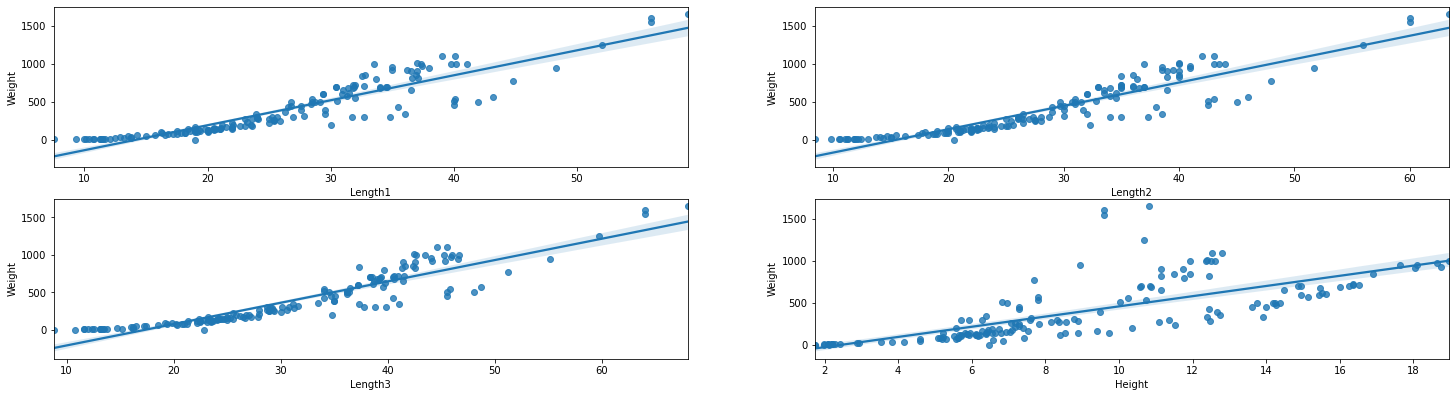

In [34]:
plt.figure(figsize=(25, 10))
plt.subplot(3,2,1)
sns.regplot(x = 'Length1', y = 'Weight', data = fish)
plt.subplot(3,2,2)
sns.regplot(x = 'Length2', y = 'Weight', data = fish)
plt.subplot(3,2,3)
sns.regplot(x = 'Length3', y = 'Weight', data = fish)
plt.subplot(3,2,4)
sns.regplot(x = 'Height', y = 'Weight', data = fish)
plt.show()

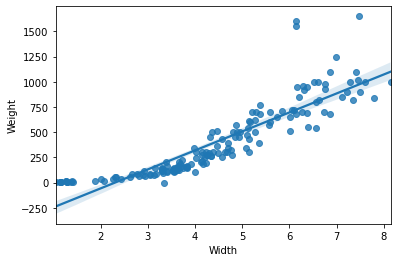

In [35]:
plt.figure()
sns.regplot(x = 'Width', y = 'Weight', data = fish);
plt.show()

### Correlation Matrix

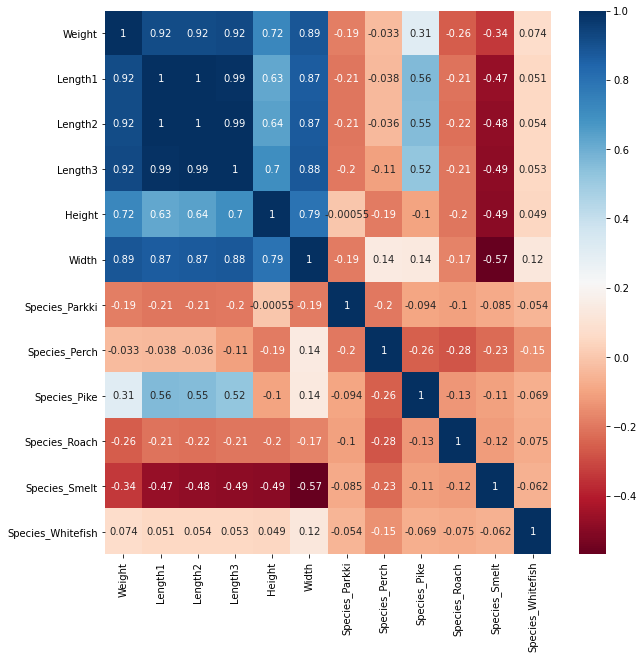

In [36]:
plt.figure(figsize = (10,10))
sns.heatmap(fish_new.corr(), annot = True, cmap="RdBu")
plt.show()

### RESCALING THE FEATURES

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler= MinMaxScaler()

In [39]:
df_train.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
6,500.0,26.8,29.7,34.5,14.1795,5.2785,0,0,0,0,0,0
25,725.0,31.8,35.0,40.9,16.3600,6.0532,0,0,0,0,0,0
21,685.0,31.4,34.0,39.2,15.9936,5.3704,0,0,0,0,0,0
75,51.5,15.0,16.2,17.2,4.5924,2.6316,0,1,0,0,0,0
84,125.0,19.0,21.0,22.5,5.6925,3.6675,0,1,0,0,0,0


In [40]:
df_train.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

In [41]:
num_vars = ['Length1', 'Length2', 'Length3', 'Height', 'Width']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [42]:
df_train.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
6,500.0,0.374757,0.387273,0.434122,0.736446,0.590554,0,0,0,0,0,0
25,725.0,0.471845,0.483636,0.542230,0.865417,0.701327,0,0,0,0,0,0
21,685.0,0.464078,0.465455,0.513514,0.843745,0.603695,0,0,0,0,0,0
75,51.5,0.145631,0.141818,0.141892,0.169397,0.212080,0,1,0,0,0,0
84,125.0,0.223301,0.229091,0.231419,0.234465,0.360201,0,1,0,0,0,0


In [43]:
df_train.describe()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,395.444144,0.361847,0.361818,0.376446,0.421112,0.466662,0.081081,0.360360,0.108108,0.117117,0.081081,0.045045
std,370.471174,0.199643,0.200158,0.200944,0.244896,0.239262,0.274198,0.482282,0.311925,0.323018,0.274198,0.208344
min,5.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.227184,0.229091,0.245777,0.246516,0.323231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,272.000000,0.322330,0.329091,0.341216,0.358644,0.443148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,615.000000,0.474757,0.483636,0.511824,0.615893,0.597239,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1650.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### BUILDING A LINEAR MODEL

### Dividing into X and Y sets for the model building

In [44]:
y_train = df_train.pop('Weight')
X_train = df_train

In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
lm= LinearRegression()
lm.fit(X_train,y_train)
rfe= RFE(lm,6)
rfe=rfe.fit(X_train,y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Length1', True, 1),
 ('Length2', True, 1),
 ('Length3', True, 1),
 ('Height', True, 1),
 ('Width', False, 5),
 ('Species_Parkki', False, 2),
 ('Species_Perch', False, 4),
 ('Species_Pike', True, 1),
 ('Species_Roach', False, 3),
 ('Species_Smelt', True, 1),
 ('Species_Whitefish', False, 6)]

In [48]:
col=X_train.columns[rfe.support_]
col

Index(['Length1', 'Length2', 'Length3', 'Height', 'Species_Pike',
       'Species_Smelt'],
      dtype='object')

In [49]:
X_train.columns[~rfe.support_]

Index(['Width', 'Species_Parkki', 'Species_Perch', 'Species_Roach',
       'Species_Whitefish'],
      dtype='object')

In [50]:
X_train_rfe = X_train[col]

### Building Linear Model using 'STATS MODEL'

### Model 1

### VIF

In [52]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Length2,9910.62
0,Length1,7992.47
2,Length3,1926.67
3,Height,61.94
4,Species_Pike,5.97
5,Species_Smelt,1.45


In [53]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [54]:
lr1.params

const            -390.352961
Length1          -938.437859
Length2          3230.299325
Length3           -98.698510
Height             20.925668
Species_Pike     -342.905143
Species_Smelt     271.341705
dtype: float64

In [55]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     246.3
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           4.21e-59
Time:                        19:32:39   Log-Likelihood:                -662.46
No. Observations:                 111   AIC:                             1339.
Df Residuals:                     104   BIC:                             1358.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -390.3530     26.022    -15.001

### Model 2

In [56]:
X_train_new = X_train_rfe.drop(["Length3"], axis = 1)

### VIF

In [57]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Length2,8281.01
0,Length1,7979.89
2,Height,16.71
3,Species_Pike,3.52
4,Species_Smelt,1.30


In [58]:
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [59]:
lr2.params

const            -390.812922
Length1          -927.435660
Length2          3134.675618
Height              7.902951
Species_Pike     -347.685749
Species_Smelt     270.397627
dtype: float64

In [60]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     298.4
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           2.32e-60
Time:                        19:34:52   Log-Likelihood:                -662.47
No. Observations:                 111   AIC:                             1337.
Df Residuals:                     105   BIC:                             1353.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -390.8129     25.506    -15.323

### Model 3

In [61]:
X_train_new = X_train_new.drop(["Height"], axis = 1)

### VIF

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Length1,6602.24
1,Length2,6552.08
2,Species_Pike,1.73
3,Species_Smelt,1.29


In [63]:
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [64]:
lr3.params

const            -390.403584
Length1         -1012.335722
Length2          3228.707206
Species_Pike     -351.226683
Species_Smelt     270.397742
dtype: float64

In [65]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     376.5
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           1.13e-61
Time:                        19:36:57   Log-Likelihood:                -662.47
No. Observations:                 111   AIC:                             1335.
Df Residuals:                     106   BIC:                             1348.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -390.4036     25.061    -15.578

### Model 4

In [66]:
X_train_new = X_train_new.drop(["Length1"], axis = 1)

### VIF

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Length2,1.47
1,Species_Pike,1.47
2,Species_Smelt,1.00


In [68]:
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [69]:
lr4.params

const            -390.551562
Length2          2221.235585
Species_Pike     -359.259616
Species_Smelt     260.864342
dtype: float64

In [70]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     505.2
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           5.39e-63
Time:                        19:39:19   Log-Likelihood:                -662.64
No. Observations:                 111   AIC:                             1333.
Df Residuals:                     107   BIC:                             1344.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -390.5516     24.979    -15.635

### Final Model Interpretation

### F Statistics

### The equation of best fitted surface based on model lr4:

### Interpretation of Coefficients:

### ASSUMPTIONS

### Error terms are normally distributed with mean zero (not X, Y)

In [71]:
y_train_pred = lr4.predict(X_train_lm4)

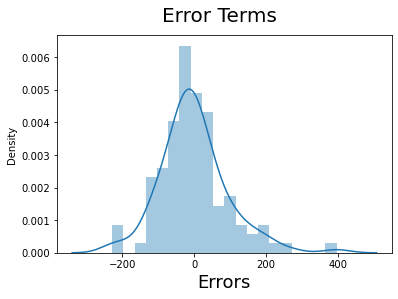

In [72]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) ;

###  There is a linear relationship between X and Y

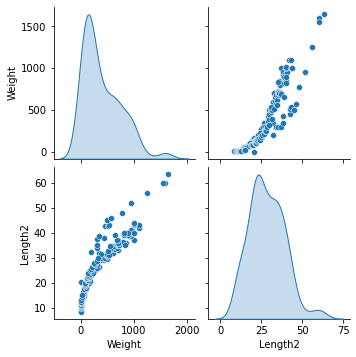

In [73]:
fish_new=fish_new[[ 'Weight', 'Length2']]

sns.pairplot(fish_new, diag_kind='kde')
plt.show()

### There is No Multicollinearity between the predictor variables

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Length2,1.47
1,Species_Pike,1.47
2,Species_Smelt,1.00


### MAKING PREDICTION USING FINAL MODEL

### Applying the scaling on the test sets

In [75]:
num_vars = ['Length1', 'Length2', 'Length3', 'Height', 'Width']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [76]:
df_test.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
45,160.0,0.252427,0.256364,0.278716,0.313775,0.382049,0,0,0,1,0,0
11,500.0,0.411650,0.410909,0.462838,0.747797,0.524222,0,0,0,0,0,0
127,1000.0,0.652427,0.647273,0.638514,0.636446,0.921900,0,1,0,0,0,0
15,600.0,0.425243,0.429091,0.479730,0.810883,0.633665,0,0,0,0,0,0
7,390.0,0.390291,0.392727,0.442568,0.647164,0.506406,0,0,0,0,0,0


In [77]:
df_test.describe()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,404.991667,0.369053,0.368788,0.384361,0.445182,0.469237,0.041667,0.333333,0.104167,0.145833,0.104167,0.020833
std,330.924770,0.182589,0.183910,0.186420,0.274375,0.247681,0.201941,0.476393,0.308709,0.356674,0.308709,0.144338
min,0.000000,0.034951,0.025455,0.033784,0.000615,-0.014413,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.000000,0.224757,0.228182,0.236486,0.267332,0.317605,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,317.500000,0.400971,0.401818,0.432432,0.355155,0.452650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,700.000000,0.512621,0.520000,0.545608,0.636056,0.694685,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1000.000000,0.724272,0.720000,0.716216,1.019022,0.921900,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [78]:
y_test = df_test.pop('Weight')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 45 to 37
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Length1            48 non-null     float64
 1   Length2            48 non-null     float64
 2   Length3            48 non-null     float64
 3   Height             48 non-null     float64
 4   Width              48 non-null     float64
 5   Species_Parkki     48 non-null     uint8  
 6   Species_Perch      48 non-null     uint8  
 7   Species_Pike       48 non-null     uint8  
 8   Species_Roach      48 non-null     uint8  
 9   Species_Smelt      48 non-null     uint8  
 10  Species_Whitefish  48 non-null     uint8  
dtypes: float64(5), uint8(6)
memory usage: 2.5 KB


In [79]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test)
X_test_lm4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 45 to 37
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          48 non-null     float64
 1   Length2        48 non-null     float64
 2   Species_Pike   48 non-null     uint8  
 3   Species_Smelt  48 non-null     uint8  
dtypes: float64(2), uint8(2)
memory usage: 1.2 KB


In [80]:
y_pred = lr4.predict(X_test_lm4)

### MODEL EVALUATION

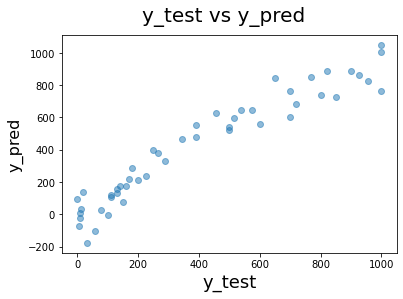

In [81]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

### R^2 Value for TEST

In [82]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9143237254054877

### Adjusted R^2 Value for TEST

In [83]:
r2=0.9143237254054878 

In [84]:
X_test.shape

(48, 3)

In [85]:
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.9084821612285892

### Final Result Comparison

### FINAL REPORT¶

###### As per our final Model, the top predictor variables that influences the Weight are:

###### Length2 : A coefficient value of ‘2221.235585’ indicated that a unit increase in length variable, increases the weight numbers by 2221.235585 units.
###### Species_Pike: A coefficient value of ‘359.259616’ indicated that a unit increase in Species_Pike variable, decreases the weight numbers by 359.259616 units.
###### Species_Smelt: A coefficient value of ‘260.864342’ indicated that a unit increase in Species_Smelt variable, increases the weight numbers by 260.864342 units.